## Importing

In [27]:
import numpy as np
import tensorflow as tf
from keras import layers, models, Input
import matplotlib.pyplot as plt

## Dataset Loading

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Reshaping and Normalization

In [29]:
# Reshaping training data
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Normalizing training data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

## Model Formation

In [30]:
data_augmentation = models.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])


model = models.Sequential([
    Input(shape=(28,28,1)),
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Model Compilation

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [32]:
model.fit(x_train, y_train, epochs=7, batch_size=32)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8799 - loss: 0.3795
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9538 - loss: 0.1485
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9640 - loss: 0.1144
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9707 - loss: 0.0972
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9729 - loss: 0.0869
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9758 - loss: 0.0789
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9786 - loss: 0.0699


## Model Evaluation

In [33]:
_, acc = model.evaluate(x_test, y_test)
print(f"The Accuracy of the model is: {round(acc*100,2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9821 - loss: 0.0600
The Accuracy of the model is: 98.21%


## Model Saving

In [34]:
model.save('app.keras')
print('Model Saved Successfully')

Model Saved Successfully


## Model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
The prediction is: 9


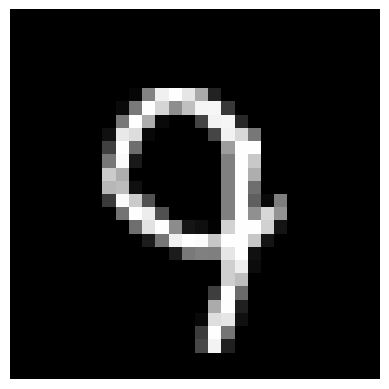

In [39]:
idx = 999
img = x_test[idx]

image_reshape = np.expand_dims(img, axis=0)

prediction = model.predict(image_reshape)

print(f"The prediction is: {np.argmax(prediction)}")

plt.axis('off')
plt.imshow(img, cmap='gray')